# Importing all the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re 
from nltk.corpus import stopwords

### Reading the dataset 

In [2]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
print(data.shape)
print(data.isnull().sum())

(1000, 2)
Review    0
Liked     0
dtype: int64


In [4]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

([<matplotlib.patches.Wedge at 0x1e271e19fd0>,
 [Text(6.735557395310444e-17, 1.1, '1'),
  Text(-2.0206672185931328e-16, -1.1, '0')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

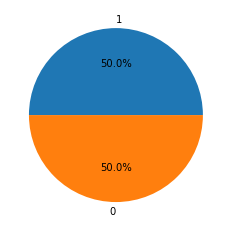

In [5]:
plt.pie(data['Liked'].value_counts().values,labels=data['Liked'].value_counts().index,autopct='%1.1f%%')

In [6]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps

<PorterStemmer>

### Now , we will define the fuction which will help us to clean the text 

In [7]:
def text_clean(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text=' '.join(text)
    return text

### Now we will apply the function to the text 

In [8]:
data['New text after processing']=data['Review'].apply(lambda x: text_clean(x))


In [9]:
data.head()

,Review,Liked,New text after processing
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


### Seperating the x and y variables and split them for training and testing purpose

In [10]:
x=data['New text after processing'].values
y=data['Liked'].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Now we will import the libraries of machine learning (TfidfVectorizer )
#### and classification model libraries ,I will use only logistic and KNN
#### you can use many more....

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
tfidf=TfidfVectorizer()
knn=KNeighborsClassifier(n_neighbors=7)
model_knn=Pipeline([('vectorizer',tfidf),('classifier',knn)])
model_knn.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

In [13]:
from sklearn.metrics import confusion_matrix
predictions=model_knn.predict(x_test)
cm=confusion_matrix(y_test,predictions)
cm

array([[80, 17],
       [39, 64]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,predictions)
ac

0.72

### From the above we can see knn is 72 percent accurate 


#### Now , logistic regression ...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
tfidf=TfidfVectorizer()
logistic=LogisticRegression()
model_logistic=Pipeline([('vectorizer',tfidf),('classifier',logistic)])
model_logistic.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [16]:
from sklearn.metrics import confusion_matrix
predictions=model_logistic.predict(x_test)
cm=confusion_matrix(y_test,predictions)
cm

array([[83, 14],
       [36, 67]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,predictions)
ac

0.75

### Logistic regression is 75 percent accurate 


### Now we will try to predict the new review using logistic as it is more accurate ...

In [18]:
review_1=text_clean('very ......NICE ,,,,,decoration')
review_1=np.array([review_1])
model_logistic.predict(review_1)

array([1], dtype=int64)

In [19]:
review_2=text_clean('WORSt...... experience')
review_2=np.array([review_2])
model_logistic.predict(review_2)

array([0], dtype=int64)

### Final dataset with predictions as well as the actual value....


In [20]:
final_predictions=model_logistic.predict(x)

In [21]:
data_final=data
data_final['Predictions']=final_predictions
data_final=data.drop(['New text after processing'],axis=1)
data_final

,Review,Liked,Predictions
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,1
2,Not tasty and the texture was just nasty.,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,1
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,0


#### I have made this model by using logistic and knn ... but you can try all the classification models 
#### This model is 75 percent accurate ..


# Thank You !!
